# Car Insurance Claim Prediction
##### Predict whether the policyholder will file a claim in the next 6 months or not. Note that this implies an imbalance problem and a possible accuracy paradox, since the target variable is usually extremely small in the dataset.
---

## 1. Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Logistic model
from sklearn.linear_model import LogisticRegression
# Neural Networks model for Classification using TensorFlow
from keras.layers import Dense
from keras.layers import InputLayer
from keras import Sequential
# Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
# CatBoost Classifier model
from catboost import CatBoostClassifier
# Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier
# XGBClassifier model
import xgboost
# model creation
from xgboost import XGBClassifier
# LightGBM model
import lightgbm as lgb
from lightgbm import LGBMClassifier
# import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score #NOT USED
# Importing resample and SMOTE for resampling
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
# Chi-sq test
from scipy.stats import chi2_contingency

In [3]:
# Gini metric
def Gini_normalized(y_actual, y_pred):
    """Simple normalized Gini based on Scikit-Learn's roc_auc_score"""
    gini = lambda a, p: 2 * roc_auc_score(a, p) - 1
    return gini(y_actual, y_pred) / gini(y_actual, y_actual)

In [4]:
# importing the dataset
car_train = pd.read_csv('car_insurance.csv', header = 0)

In [5]:
# set the display to 100 rows and columns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

## 2. Exploratory Data Analysis (EDA)

In [6]:
# A first look at the auto insurance dataset
car_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [7]:
print(f'The train dataset has {car_train.shape[0]} rows and {car_train.shape[1]} columns (variables)')

The train dataset has 58592 rows and 44 columns (variables)


In [8]:
# Checking missing values
cols=[]
for col in car_train.columns:
    if car_train[col].isnull().sum()>0:
        print(f'The column {col} has {car_train[col].isnull().sum()} missing values')
        cols = cols.append(1)
if len(cols)==0:
    print('The data set has no column with missing values')   

The data set has no column with missing values


In [9]:
# Verifying duplicated rows
car_train[car_train.duplicated()]

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim


There is no duplicated row in the dataset

In [10]:
# General statistics about the car insurance dataset
car_train.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


### 2.1. Target Variable: Analyzing variable `is_claim`, which indicates if the policyholder file a claim in the next 6 month or not. 

Text(0, 0.5, '')

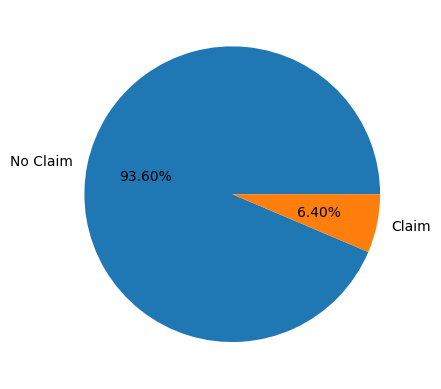

In [11]:
# pie graph
car_train['is_claim'].value_counts().plot(kind='pie', autopct='%1.2f%%', labels=['No Claim', 'Claim'])
plt.ylabel("")

In [12]:
print(f'{round(car_train.is_claim.value_counts(normalize=True)[1]*100,2)}% of the policyholders filed a claim, corresponding to {car_train.is_claim.sum()} \
cases over {car_train.shape[0]}')

6.4% of the policyholders filed a claim, corresponding to 3748 cases over 58592


Since we have 6.40% of claims and it is the event of interest, we have an imbalance problem. We can apply oversample the rare events to create a balance among the data.

### 2.2 Binary Variables

Let us start with the 17 binary variables because there are many of them: `is_esc`, `is_adjustable_steering`, `is_tpms`, `is_parking_sensors`, `is_parking_camera`,  `is_front_fog_lights`, `is_rear_window_wiper`, `is_rear_window_washer`, `is_rear_window_defogger`, `is_brake_assist`, `is_power_door_locks`, `is_central_locking`, `is_power_steering`, `is_driver_seat_height_adjustable`, `is_day_night_rear_view_mirror`, `is_ecw` and `is_speed_alert`.
There are also 4 variables with two categories: `cylinder`, `transmission_type`, `gear_box` and `rear_brakes_type`. There are one variable (`airbags`) with 3 categories but the first and second categories can be joined.

In [13]:
binary_cols = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
               'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 
               'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable',
               'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']

In [14]:
# replace the words Yes and No for 1 and 0 in the binary variables
binary_replace = {'Yes' : 1,  'No': 0}
car_train[binary_cols] = car_train[binary_cols].replace(binary_replace)

In [15]:
# car_train.cylinder.unique()
# car_train.transmission_type.unique()
# car_train.gear_box.unique()
car_train.rear_brakes_type.unique()

array(['Drum', 'Disc'], dtype=object)

In [16]:
# replace 3 cylinder by 0 and 4 by 1
car_train['cylinder'] = car_train['cylinder'].replace({4 : 1, 3: 0})

In [17]:
# replace Automatic transmission_type by 1 and Manual by 0
car_train['transmission_type'] = car_train['transmission_type'].replace({'Automatic' : 1, 'Manual': 0})

In [18]:
# replace gear_box 5 by 0 and 6 by 1
car_train['gear_box'] = car_train['gear_box'].replace({6 : 1, 5: 0})

In [19]:
# replace rear_brakes_type 'Drum' by 0 and 'Disc' by 1
car_train['rear_brakes_type'] = car_train['rear_brakes_type'].replace({'Disc' : 1, 'Drum': 0})

In [20]:
# replace airbags 1 y 2 by 0 and 6 by 1
car_train['airbags'] = car_train['airbags'].replace({ 1 : 0, 2 : 0, 6 : 1})

In [21]:
binary_cols2 = [
                'is_claim', 'is_esc', 'is_tpms', 'is_parking_camera', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 
                'transmission_type', 'gear_box','rear_brakes_type', 'airbags',
                'is_adjustable_steering',  'is_front_fog_lights','is_brake_assist', 'is_power_door_locks','is_central_locking',
                'is_driver_seat_height_adjustable','is_ecw','cylinder', 'is_driver_seat_height_adjustable',
                'is_parking_sensors', 'is_power_steering','is_day_night_rear_view_mirror',  'is_speed_alert'
                ]

<AxesSubplot: >

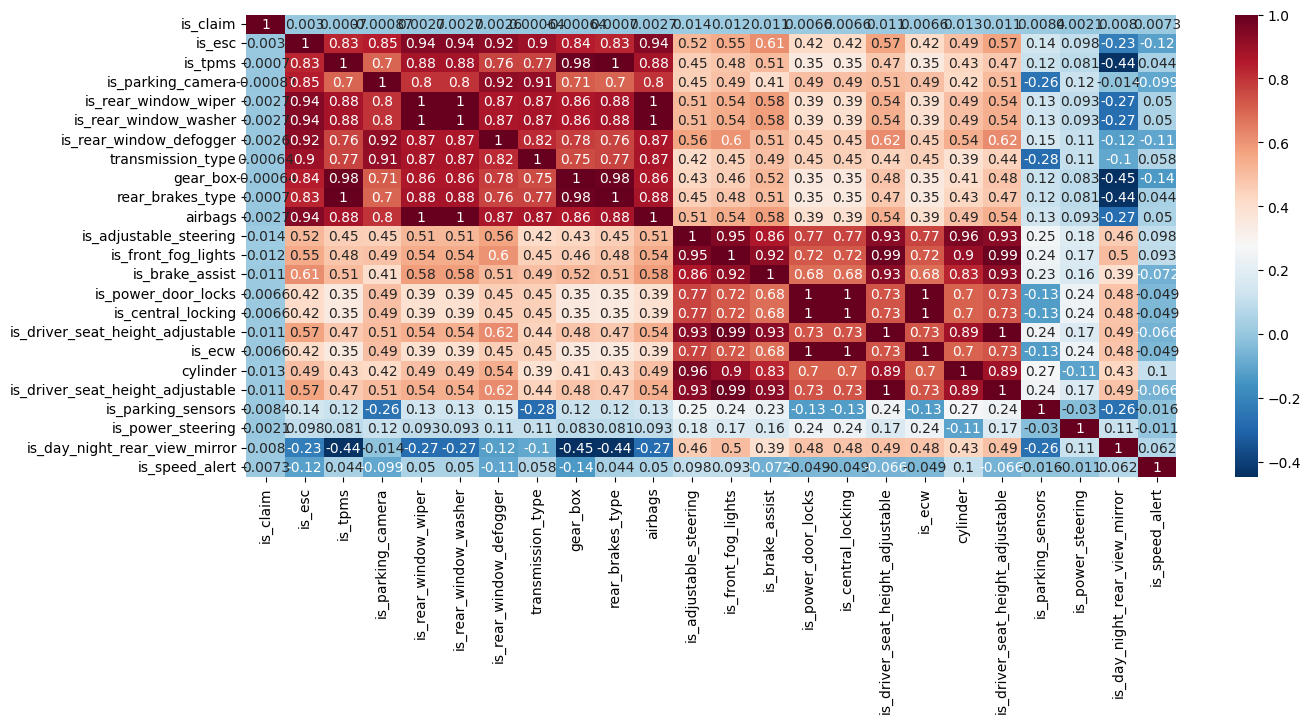

In [22]:
## Correlation matrix among the binary variables when is_claim = 1
plt.figure(figsize=(15,6))
corr=car_train[binary_cols2].corr()
sns.heatmap(corr, annot=True, cmap="RdBu_r")

1. `is_esc` is highly correlated with `is_tpms` (0.83), `is_parking_camera` (0.85), `is_rear_window_wiper` (0.94), `is_rear_window_washer` (0.94), `is_rear_window_defogger` (0.92), `transmission_type` (0.90), `gear_box` (0.84), `rear_brakes_type` (0.83) and `airbags` (0.94).
2. `is_adjustable_steering` is highly correlated with `is_front_fog_lights` (0.94), `is_brake_assist` (0.86), `is_power_door_locking` (0.79), `is_central_locking` (0.79), `is_driven_seat_height_adjustable` (0.93), `is_ecw` (0.79), `cylinder` (0.96). 
3. On the other hand, `is_parking_sensors`, `is_power_steering`, `is_day_night_rear_view_mirror` and `is_speed_alert` are not highly correlated among them and not highly correlated with the rest of variables.

At first, we select `is_esc`, `is_adjustable_steering`,  `is_parking_sensors`, `is_power_steering`, `is_day_night_rear_view_mirror` and `is_speed_alert` among the binary variables. However, note that correlations with `is_claim` are very small.

### 2.3 Quantitative Variables (`policy_tenure`, `age_of_car`, `age_of_policyholder`, `population_density`)

#### 2.3.1. Variable `policy_tenure` (time period of the policy)

Text(0.5, 1.0, 'Distribution of policy_tenure')

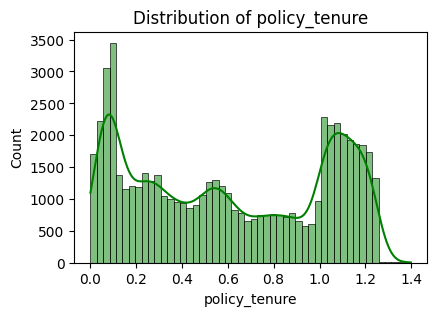

In [23]:
# Distribution policy_tenure
f = plt.figure(figsize = (10,3))
ax = f.add_subplot(121)
sns.histplot(car_train['policy_tenure'], bins=50, kde=True,color='g',ax=ax)
ax.set_title('Distribution of policy_tenure')

In [24]:
print(f'the variable policy_tenure has a min of {car_train.policy_tenure.min()} and a max of {car_train.policy_tenure.max()} with a mean of {car_train.policy_tenure.mean()}')

the variable policy_tenure has a min of 0.002735272840513 and a max of 1.39664107699389 with a mean of 0.6112461623305413


Text(0, 0.5, 'Policy Tenure')

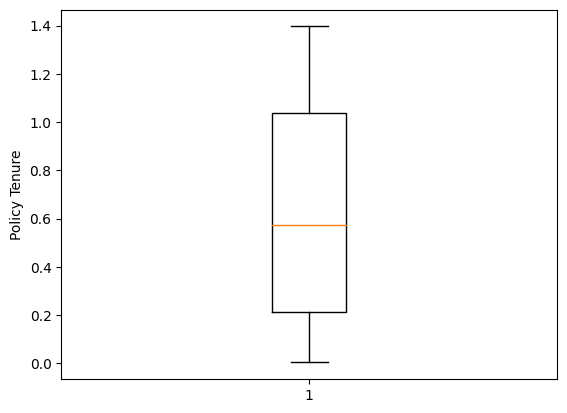

In [25]:
# Boxplot of the policy tenure
plt.boxplot(car_train.policy_tenure)
plt.ylabel("Policy Tenure")

We identify two or three peaks in the policy tenure distribution and no outliers are identified.

#### 2.3.2. Variable `age_of_car` (Normalized age of the car in years)

Text(0.5, 1.0, 'Distribution of the age of the car')

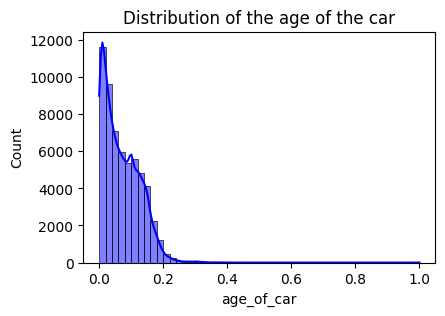

In [26]:
# Distribution of the age of the car
f = plt.figure(figsize = (10,3))
ax = f.add_subplot(121)
sns.histplot(car_train['age_of_car'], bins=50, kde=True,color='b',ax=ax)
ax.set_title('Distribution of the age of the car')

The distribution suggests the existence of outliers. Let us check the boxplot

Text(0, 0.5, 'Age of car')

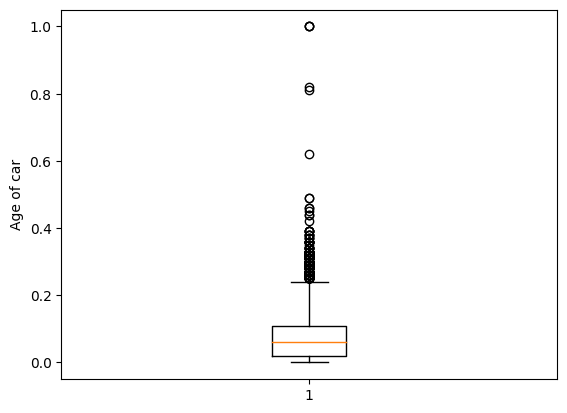

In [27]:
# Boxplot of the car year
plt.boxplot(car_train.age_of_car)
plt.ylabel("Age of car")

The graph presents the existence of outliers

In [28]:
# let us take the 99% of the sample
car_train = car_train[car_train.age_of_car  <= np.percentile(car_train.age_of_car, 99)]

Text(0, 0.5, 'Age of car')

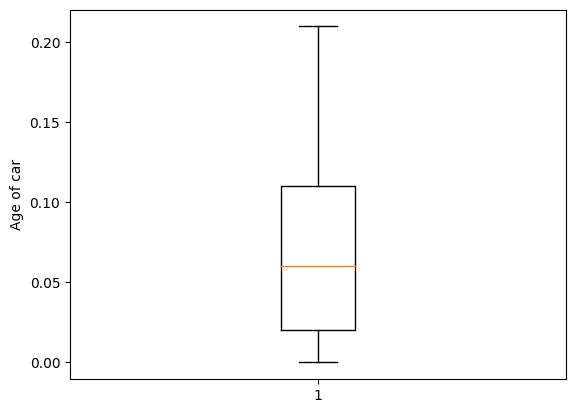

In [29]:
# Boxplot of the car year
plt.boxplot(car_train['age_of_car'])
plt.ylabel("Age of car")

In [30]:
# New dataset with age_of_car in the claims
df1 = car_train[['age_of_car','is_claim']].groupby('age_of_car', as_index = False).agg(Claims=("is_claim", "sum")).sort_values('Claims', ascending=False)
df2 = car_train[['age_of_car','is_claim']].groupby('age_of_car', as_index = False).agg(Insurances=("is_claim", "count")).sort_values('Insurances', ascending=False)
df = df1.merge(df2,left_on='age_of_car', right_on='age_of_car' )
df['percentage_claims'] = df['Claims']*100/df['Insurances']
df.sort_values('percentage_claims', ascending = False).head()

,age_of_car,Claims,Insurances,percentage_claims
0,0.00,559,5257,10.633441
8,0.07,206,2888,7.132964
6,0.10,215,3123,6.884406
11,0.11,166,2442,6.797707
5,0.05,226,3342,6.762418


Text(0.5, 1.0, 'Scatter plot - Quantity of claims vs age of the car')

<Figure size 500x500 with 0 Axes>

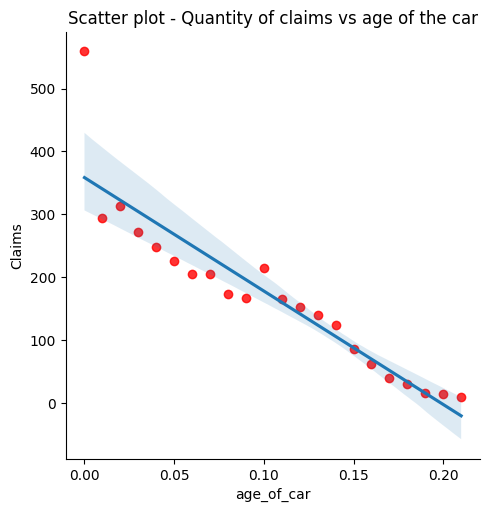

In [31]:
# distribution between quantity of claims and age of the car
plt.figure(figsize = (5,5))
sns.lmplot(data = df, x = 'age_of_car', y = 'Claims', palette = 'magma',  scatter_kws = {'color': 'r'} )
ax = plt.gca()
ax.set_title("Scatter plot - Quantity of claims vs age of the car")

The variable age of car has a decreasing impact on the number of claims until arriving to a value near 0.21

#### 2.3.3. Variable `age_of_policyholder` (Normalized age of policymaker in years)

Text(0.5, 1.0, 'Distribution of the age of the policyholder')

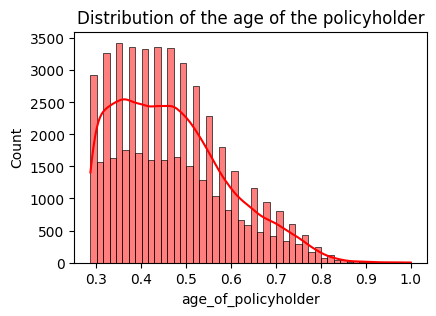

In [32]:
# Distribution of the age of the policyholder
f = plt.figure(figsize = (10,3))
ax = f.add_subplot(121)
sns.histplot(car_train['age_of_policyholder'], bins=50, kde=True,color='r',ax=ax)
ax.set_title('Distribution of the age of the policyholder')

In [33]:
# New dataset with age_of_policyholder  in the claims
df1 = car_train[['age_of_policyholder','is_claim']].groupby('age_of_policyholder', as_index = False).agg(Claims=("is_claim", "sum")).sort_values('Claims', ascending=False)
df2 = car_train[['age_of_policyholder','is_claim']].groupby('age_of_policyholder', as_index = False).agg(Insurances=("is_claim", "count")).sort_values('Insurances', ascending=False)
df = df1.merge(df2,left_on='age_of_policyholder', right_on='age_of_policyholder' )
df['percentage_claims'] = df['Claims']*100/df['Insurances']
df.sort_values('percentage_claims', ascending = False).head()

,age_of_policyholder,Claims,Insurances,percentage_claims
64,0.932692,1,3,33.333333
62,0.951923,1,3,33.333333
60,0.865385,3,12,25.000000
61,0.875000,2,10,20.000000
58,0.855769,4,21,19.047619


Text(0.5, 1.0, 'Scatter plot - claims vs age of policyholder')

<Figure size 500x500 with 0 Axes>

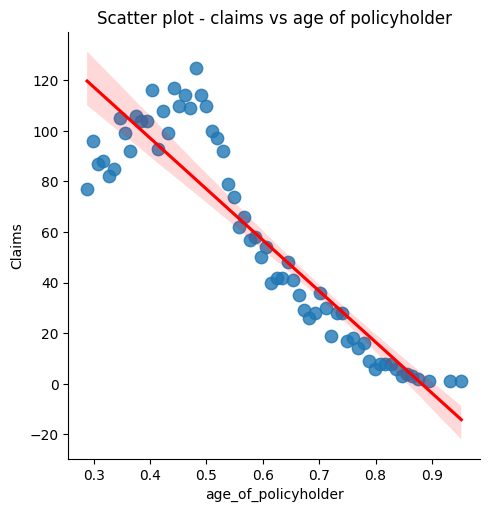

In [34]:
# distribution between quantity of claims and age of policyholder
plt.figure(figsize = (5,5))
sns.lmplot(data =df[df.Claims != 0 ], x = 'age_of_policyholder', y = 'Claims', palette = 'magma', line_kws = {'color': 'r'},   scatter_kws = {'s': 80} )
ax = plt.gca()
ax.set_title("Scatter plot - claims vs age of policyholder")

The quantity of claims decreases with the age of policyholder.

#### 2.3.4. Variable `population_density` (Population density of the policyholder's city)

Text(0.5, 1.0, 'Distribution of the population density')

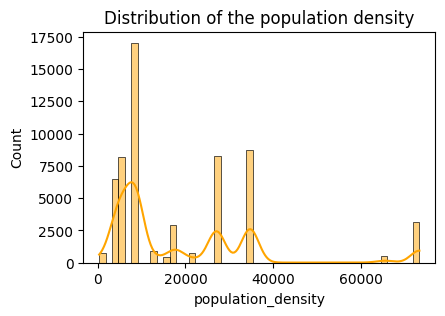

In [35]:
# Distribution of population density
f = plt.figure(figsize = (10,3))
ax = f.add_subplot(121)
sns.histplot(car_train['population_density'], bins=50, kde=True,color='orange',ax=ax)
ax.set_title('Distribution of the population density')

In [36]:
# New dataset with population_density  in the claims
df1 = car_train[['population_density','is_claim']].groupby('population_density', as_index = False).agg(Claims=("is_claim", "sum")).sort_values('Claims', ascending=False)
df2 = car_train[['population_density','is_claim']].groupby('population_density', as_index = False).agg(Insurances=("is_claim", "count")).sort_values('Insurances', ascending=False)
df = df1.merge(df2,left_on='population_density', right_on='population_density' )
df['percentage_claims'] = df['Claims']*100/df['Insurances']
df.sort_values('percentage_claims', ascending = False).head()

,population_density,Claims,Insurances,percentage_claims
17,35036,26,242,10.743802
20,16733,17,204,8.333333
4,7788,280,3622,7.730536
14,21622,51,660,7.727273
16,3264,28,372,7.526882


Text(0.5, 1.0, 'Scatter plot - Quantity of claims vs population_density')

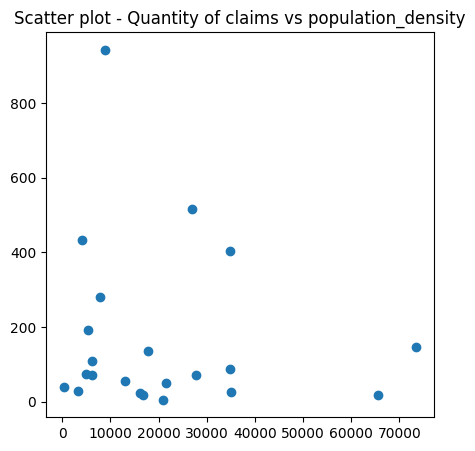

In [37]:
# distribution between quantity of claims and population_density
plt.figure(figsize = (5,5))
plt.scatter(df.population_density, df.Claims)
ax = plt.gca()
ax.set_title("Scatter plot - Quantity of claims vs population_density")

#### 2.3.5 Variable `length` (Length of the cars (Milimeter) )

Text(0.5, 1.0, 'Histogram of the length')

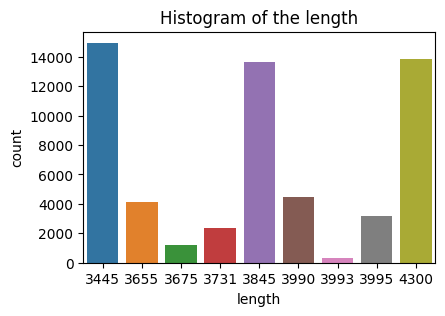

In [38]:
# distribution of the length
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
sns.countplot(x='length', data=car_train)
ax.set_title("Histogram of the length")

#### 2.3.6 Variable `width` (width of the cars (Milimeter) )

Text(0.5, 1.0, 'Histogram of the width')

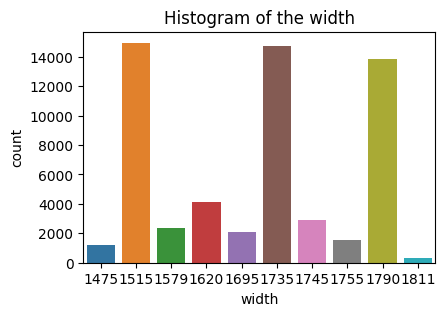

In [39]:
# distribution of the width
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
sns.countplot(x='width', data=car_train)
ax.set_title("Histogram of the width")

#### 2.3.7 Variable `gross_weight` (The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipament (kg))

Text(0.5, 1.0, 'Histogram of the gross weight')

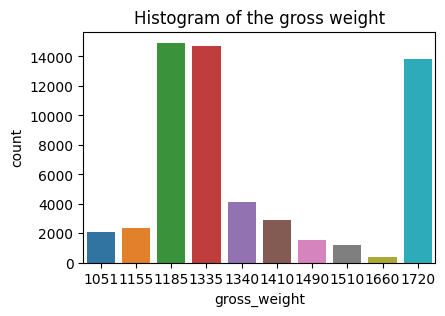

In [40]:
# distribution of the gross_weight
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
sns.countplot(x='gross_weight', data=car_train)
ax.set_title("Histogram of the gross weight")

#### 2.3.8 Variable `turning_radius` (The space a vehicle needs to make a certain turn (Meters) )

Text(0.5, 1.0, 'Histogram of turning radius')

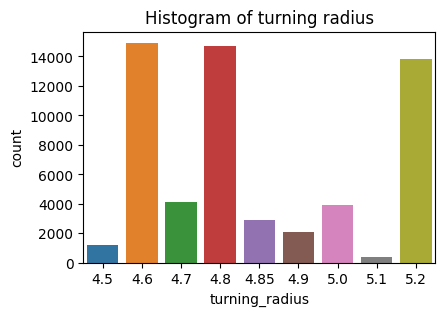

In [41]:
# distribution of turning radius
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
sns.countplot(x='turning_radius', data=car_train)
ax.set_title("Histogram of turning radius")

#### 2.3.9 variable `displacement` Engine displacement of the car (cc)

Text(0.5, 1.0, 'Histogram of displacement')

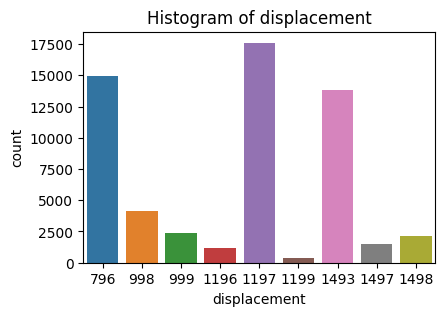

In [42]:
# distribution of displacement
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
sns.countplot(x='displacement', data=car_train)
ax.set_title("Histogram of displacement")

#### 2.3.10 Variable `ncap_rating` (Safety rating given by NCAP (out of 5))

Text(0.5, 1.0, 'Histogram of the ncap_rating')

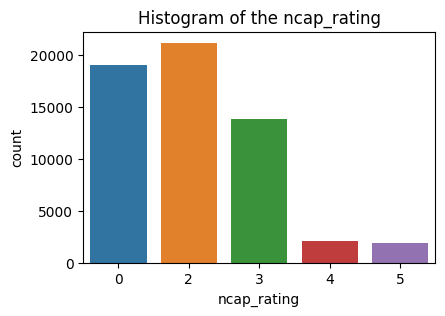

In [43]:
# distribution of the ncap_rating
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
sns.countplot(x='ncap_rating', data=car_train)
ax.set_title("Histogram of the ncap_rating")

#### 2.3.11 Variable `max_power` (Maximum Power generated by the car bhp@rpm)

In [44]:
car_train[['max_power_bhp', 'max_power_rpm']] = car_train["max_power"].apply(lambda x: pd.Series(str(x).split("@")))
car_train.drop(["max_power"], axis=1, inplace= True)

In [45]:
car_train['max_power_bhp'] = car_train['max_power_bhp'].str.replace(r'bhp','', regex=True).astype(float)
car_train['max_power_rpm'] = car_train['max_power_rpm'].str.replace(r'rpm','', regex=True).astype(float)

#### 2.3.12 Variable `max_torque` (Maximum Torque generated by the car Nm@rpm)

In [46]:
car_train[['max_torque_Nm', 'max_torque_rpm']] = car_train["max_torque"].apply(lambda x: pd.Series(str(x).split("@")))
car_train.drop(["max_torque"], axis=1, inplace= True)

In [47]:
car_train['max_torque_Nm'] = car_train['max_torque_Nm'].str.replace(r'Nm','', regex=True).astype(float)
car_train['max_torque_rpm'] = car_train['max_torque_rpm'].replace(r'rpm','', regex=True).astype(float)

<AxesSubplot: >

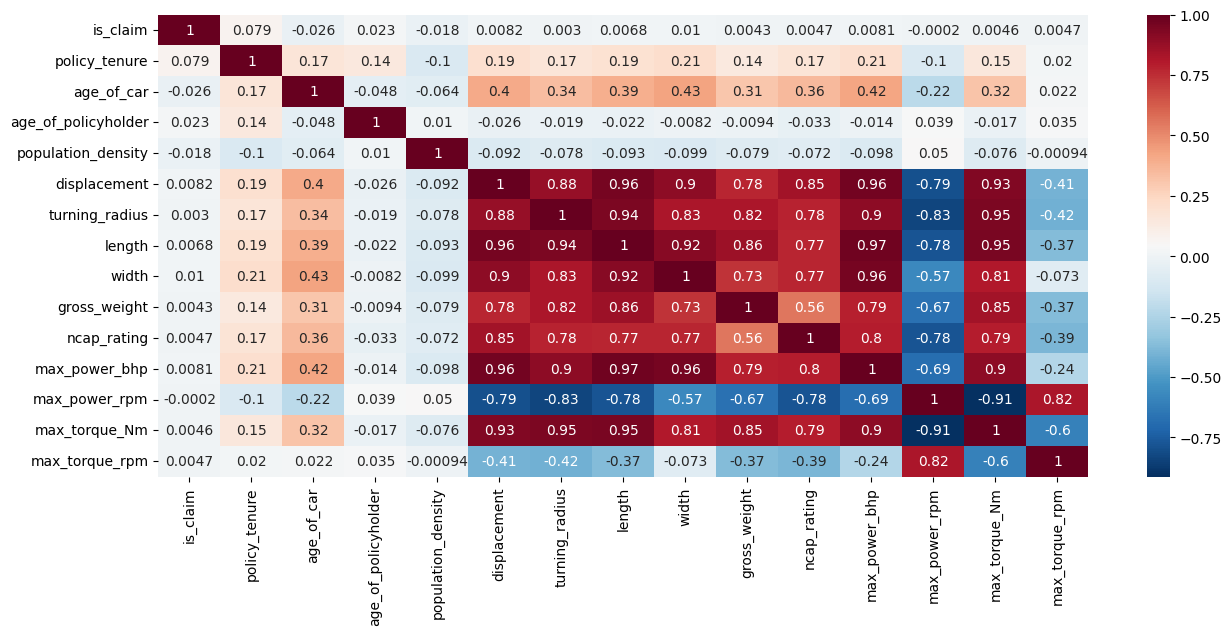

In [48]:
quantitative = [ 'is_claim', 'policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density','displacement', 'turning_radius', 'length',
                 'width', 'gross_weight', 'ncap_rating', 'max_power_bhp', 'max_power_rpm', 'max_torque_Nm', 'max_torque_rpm' ]
## Correlation matrix among the quantitative variables
plt.figure(figsize=(15,6))
corr=car_train[quantitative].corr()
sns.heatmap(corr, annot=True, cmap="RdBu_r")

variables `displacement`, `turining_radius`, `length`, `width`, `gross_weight`, `ncap_rating`, `max_power_bhp`, `max_power_rpm`, `max_torque_Nm` and `max_torque_rpm` are highly correlated among them but `width` is the most correlated with `is_claim`.
we select `policy_tenure`, `age_of_car`, `age_of_policyholder`, `population_density`, `width` and `max_torque_rpm`.

### 2.4 Categorical Variables

#### 2.4.1. Variable `area_cluster` (Area cluster of the policyholder)

In [49]:
# New dataset with model of car  in the claims
df1 = car_train[['area_cluster','is_claim']].groupby('area_cluster', as_index = False).agg(Claims=("is_claim", "sum")).sort_values('Claims', ascending=False)
df2 = car_train[['area_cluster','is_claim']].groupby('area_cluster', as_index = False).agg(Insurances=("is_claim", "count")).sort_values('Insurances', ascending=False)
df = df1.merge(df2,left_on='area_cluster', right_on='area_cluster' )
df['percentage_claims'] = df['Claims']*100/df['Insurances']
df.sort_values('Claims', ascending = False)

,area_cluster,Claims,Insurances,percentage_claims
0,C8,943,13422,7.025779
1,C2,516,7287,7.081103
2,C3,432,6074,7.112282
3,C5,403,6938,5.808590
4,C14,280,3622,7.730536
5,C13,193,3381,5.708370
6,C10,147,3120,4.711538
7,C9,136,2715,5.009208
8,C7,109,2161,5.043961
9,C12,87,1566,5.555556


In [50]:
# let us consider the order of claims in the different areas. Cluster with more insurances are related with more claims

var_areas ={'C8':22,'C2':21, 'C3':20,'C5':19,'C14':18,'C13':17,'C10':16,'C9':15,'C7':14,'C12':13,
                                    'C1':12,'C11':11,'C19':10,'C6':9,'C4':8,'C15':7,'C21':6,'C18':5,'C16':4,'C17':3,'C22':2,
                                    'C20':1}

car_train['area_cluster'].replace( var_areas, inplace=True)

Note that there is an increasing impact on claims. Area clusters with larger amounts of insurance have more claims. 

#### 2.4.2 Variable `make` (Encoded manufacturer/ company of the car)

In [51]:
# New dataset with the importance of encoded manufactured of the car  in the claims
make1 = car_train[['make','is_claim']].groupby('make', as_index = False).agg(Claims=("is_claim", "sum")).sort_values('Claims', ascending=False)
make2 = car_train[['make','is_claim']].groupby('make', as_index = False).agg(Insurances=("is_claim", "count")).sort_values('Insurances', ascending=False)
makes = make1.merge(make2,left_on='make', right_on='make' )
makes['percentage_claims'] = makes['Claims']*100/makes['Insurances']
makes.sort_values('percentage_claims', ascending = False)


,make,Claims,Insurances,percentage_claims
3,4,129,1883,6.850770
0,1,2446,37865,6.459791
1,3,891,13808,6.452781
2,5,133,2110,6.303318
4,2,127,2354,5.395072


In [52]:
# Cross tabulation between make and area_cluster
CrosstabResult=pd.crosstab(index=car_train['make'],columns=car_train['area_cluster'])
print(CrosstabResult)

area_cluster  1    2    3    4    5    6    7    8    9    10   11    12   13  \
make                                                                            
1             88  159  404  348  215  272  482  472  654  554  857  1127  978   
2              3    9    8    7    4   10   31   23   29   37   55    42   79   
3             13   27   51   32   19   70  188  125  162  285  198   216  367   
4              1    5   13    3    2   15   27   12   16   42   33    32   64   
5              2    4   12   10    2    5   39   28   20   30   64    41   78   

area_cluster    14    15    16    17    18    19    20    21    22  
make                                                                
1             1507  1920  2252  2002  2104  4804  4748  4569  7349  
2               61   115   118   166   148   306   158   415   530  
3              456   489   547   984  1055  1294   893  1740  4597  
4               52    78    99   112   137   275   136   250   479  
5               85

In [53]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
# Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


make and area_cluster are correlated

#### 2.4.3 Variable `segment` (Segment of the car {A/B1/B2/C1/C2})

In [54]:
# New dataset with the importance of the segment of the car  in the claims
segment1 = car_train[['segment','is_claim']].groupby('segment', as_index = False).agg(Claims=("is_claim", "sum")).sort_values('Claims', ascending=False)
segment2 = car_train[['segment','is_claim']].groupby('segment', as_index = False).agg(Insurances=("is_claim", "count")).sort_values('Insurances', ascending=False)
segments = segment1.merge(segment2,left_on='segment', right_on='segment' )
segments['percentage_claims'] = segments['Claims']*100/segments['Insurances']
segments.sort_values('percentage_claims', ascending = False)

,segment,Claims,Insurances,percentage_claims
0,B2,1247,18078,6.897887
2,C2,891,13808,6.452781
4,C1,227,3519,6.450696
5,Utility,73,1195,6.108787
1,A,1045,17298,6.041161
3,B1,243,4122,5.895197


In [55]:
# Cross tabulation between area_cluster and segment
CrosstabResult=pd.crosstab(index=car_train['segment'],columns=car_train['area_cluster'])
print(CrosstabResult)

area_cluster  1   2    3    4    5    6    7    8    9    10   11   12   13  \
segment                                                                       
A             58  87  276  287  179  131  225  295  343  201  372  777  321   
B1             6  17   32   29   13   30   43   51   76   64   77   74  117   
B2            24  61  103   30   28  123  229  129  250  310  453  299  612   
C1             6   8   20   17    3   13   58   46   36   60   86   73  112   
C2            13  27   51   32   19   70  188  125  162  285  198  216  367   
Utility        0   4    6    5    0    5   24   14   14   28   21   19   37   

area_cluster   14    15    16    17    18    19    20    21    22  
segment                                                            
A             741  1027  1350   730   477  2851  3465  2014  1091  
B1            194   181   175   240   328   523   335   550   967  
B2            609   784   822  1168  1388  1707  1023  2261  5665  
C1            116   187   1

In [56]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
# Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


make and segment are correlated

#### 2.4.4 Variable `model` (encoded model of the car)

In [57]:
# New dataset with model of car  in the claims
df1 = car_train[['model','is_claim']].groupby('model', as_index = False).agg(Claims=("is_claim", "sum")).sort_values('Claims', ascending=False)
df2 = car_train[['model','is_claim']].groupby('model', as_index = False).agg(Insurances=("is_claim", "count")).sort_values('Insurances', ascending=False)
df = df1.merge(df2,left_on='model', right_on='model' )
df['percentage_claims'] = df['Claims']*100/df['Insurances']
df.sort_values('percentage_claims', ascending = False)

,model,Claims,Insurances,percentage_claims
8,M2,79,1059,7.459868
7,M5,114,1533,7.436399
0,M6,935,13632,6.858862
4,M7,198,2913,6.797116
2,M4,891,13808,6.452781
5,M9,133,2110,6.303318
1,M1,918,14944,6.142934
9,M10,73,1195,6.108787
3,M8,243,4122,5.895197
6,M3,127,2354,5.395072


In [58]:
# Cross tabulation between model and area_cluster
CrosstabResult=pd.crosstab(index=car_train['model'],columns=car_train['area_cluster'])
print(CrosstabResult)

area_cluster  1   2    3    4    5    6    7    8    9    10   11   12   13  \
model                                                                         
M1            55  78  268  280  175  121  194  272  314  164  317  735  242   
M10            0   4    6    5    0    5   24   14   14   28   21   19   37   
M11            1   0    1    3    1    5    3    1    1    5    8    4    7   
M2             3   4    7    4    0    3   16   17   15   25   14   28   27   
M3             3   9    8    7    4   10   31   23   29   37   55   42   79   
M4            13  27   51   32   19   70  188  125  162  285  198  216  367   
M5             0   5   12    0    1   10   24   11   15   37   25   28   57   
M6            17  44   80   25   22   87  164   94  191  226  299  226  465   
M7             7  12   11    5    5   26   41   24   44   47  129   45   90   
M8             6  17   32   29   13   30   43   51   76   64   77   74  117   
M9             2   4   12   10    2    5   39   28  

In [59]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
# Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


make and model are also correlated

#### 2.4.8 Variable `engine_type` (Type of engine used in the car)

In [60]:
# New dataset with engine type of car in the claims
df1 = car_train[['engine_type','is_claim']].groupby('engine_type', as_index = False).agg(Claims=("is_claim", "sum")).sort_values('Claims', ascending=False)
df2 = car_train[['engine_type','is_claim']].groupby('engine_type', as_index = False).agg(Insurances=("is_claim", "count")).sort_values('Insurances', ascending=False)
df = df1.merge(df2,left_on='engine_type', right_on='engine_type' )
df['percentage_claims'] = df['Claims']*100/df['Insurances']
df.sort_values('percentage_claims', ascending = False)

,engine_type,Claims,Insurances,percentage_claims
8,1.2 L K12N Dualjet,79,1059,7.459868
7,1.5 Turbocharged Revotorq,114,1533,7.436399
0,K Series Dual jet,935,13632,6.858862
4,1.2 L K Series Engine,198,2913,6.797116
2,1.5 L U2 CRDi,891,13808,6.452781
5,i-DTEC,133,2110,6.303318
1,F8D Petrol Engine,918,14944,6.142934
9,G12B,73,1195,6.108787
3,K10C,243,4122,5.895197
6,1.0 SCe,127,2354,5.395072


In [61]:
# Cross tabulation between engine_type and area_cluster
CrosstabResult=pd.crosstab(index=car_train['engine_type'],columns=car_train['area_cluster'])
print(CrosstabResult)

area_cluster               1   2    3    4    5    6    7    8    9    10  \
engine_type                                                                 
1.0 SCe                     3   9    8    7    4   10   31   23   29   37   
1.2 L K Series Engine       7  12   11    5    5   26   41   24   44   47   
1.2 L K12N Dualjet          3   4    7    4    0    3   16   17   15   25   
1.5 L U2 CRDi              13  27   51   32   19   70  188  125  162  285   
1.5 Turbocharged Revotorq   0   5   12    0    1   10   24   11   15   37   
1.5 Turbocharged Revotron   1   0    1    3    1    5    3    1    1    5   
F8D Petrol Engine          55  78  268  280  175  121  194  272  314  164   
G12B                        0   4    6    5    0    5   24   14   14   28   
K Series Dual jet          17  44   80   25   22   87  164   94  191  226   
K10C                        6  17   32   29   13   30   43   51   76   64   
i-DTEC                      2   4   12   10    2    5   39   28   20   30   

In [62]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
# Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


make and engine_type are also correlated

#### 2.4.5 Variable `fuel_type` (type of fuel used by the car)

<AxesSubplot: ylabel='fuel_type'>

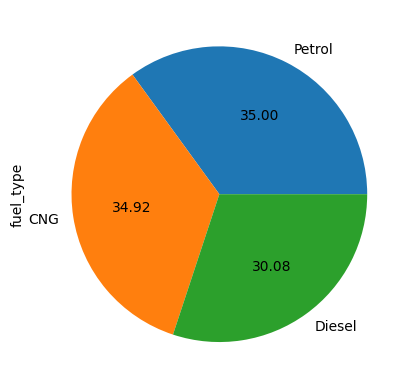

In [63]:
# pie graph
car_train['fuel_type'].value_counts().plot(kind='pie', autopct='%.2f')

#### 2.4.10. Variable `steering_type` (Type of the power steering present in the car)

In [64]:
# New dataset with impact of steering_type on the claims
df1 = car_train[['steering_type','is_claim']].groupby('steering_type', as_index = False).agg(Claims=("is_claim", "sum")).sort_values('Claims', ascending=False)
df2 = car_train[['steering_type','is_claim']].groupby('steering_type', as_index = False).agg(Insurances=("is_claim", "count")).sort_values('Insurances', ascending=False)
df = df1.merge(df2,left_on='steering_type', right_on='steering_type' )
df['percentage_claims'] = df['Claims']*100/df['Insurances']
df.sort_values('percentage_claims', ascending = False)

,steering_type,Claims,Insurances,percentage_claims
1,Electric,1586,23601,6.720054
0,Power,2067,33224,6.221406
2,Manual,73,1195,6.108787


In [65]:
car_train.drop('policy_id', axis=1, inplace=True)

In [66]:
# dummies for make
car_train = pd.get_dummies(data=car_train, prefix="make", prefix_sep="_",
                columns = ['make'],
                drop_first = True,
                dtype = 'int8')
# dummies for segment
car_train = pd.get_dummies(data=car_train, prefix="segment", prefix_sep="_",
                columns = ['segment'],
                drop_first = True,
                dtype = 'int8')
# dummies for model
car_train = pd.get_dummies(data=car_train, prefix="M", prefix_sep="_",
                columns = ['model'],
                drop_first = True,
                dtype = 'int8')
# dummies for engine_type
car_train = pd.get_dummies(data=car_train, prefix="engine", prefix_sep="_",
                columns = ['engine_type'],
                drop_first = True,
                dtype = 'int8')
# dummies for fuel_type
car_train = pd.get_dummies(data=car_train, prefix="fuel", prefix_sep="_",
                columns = ['fuel_type'],
                drop_first = True,
                dtype = 'int8')
# dummies for steering_type
car_train = pd.get_dummies(data=car_train, prefix="steer", prefix_sep="_",
                columns = ['steering_type'],
                drop_first = True,
                dtype = 'int8')

In [67]:
car_train.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'airbags', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_power_bhp',
       'max_power_rpm', 'max_torque_Nm', 'max_torque_rpm', 'make_2', 'make_3',
       'make_4', 'make_5', 'segment_B1', 'segment_B2', 'segment_C1',
       'segment_C2', 'segment_Utility', 'M_M10', 'M_M11', 'M_M2', 'M_M3',
       'M_M4', 'M_M5', 'M_M6', 'M_M7', 'M_M8',

## 3. Training and Validation

### Common assumptions

In [68]:
variables = ['is_claim',
             'policy_tenure', 'age_of_car', 'age_of_policyholder',
             'population_density', 'width', 'max_torque_rpm', 'is_esc', 'is_speed_alert','area_cluster',
             'steer_Manual','steer_Power'
            ]

<AxesSubplot: >

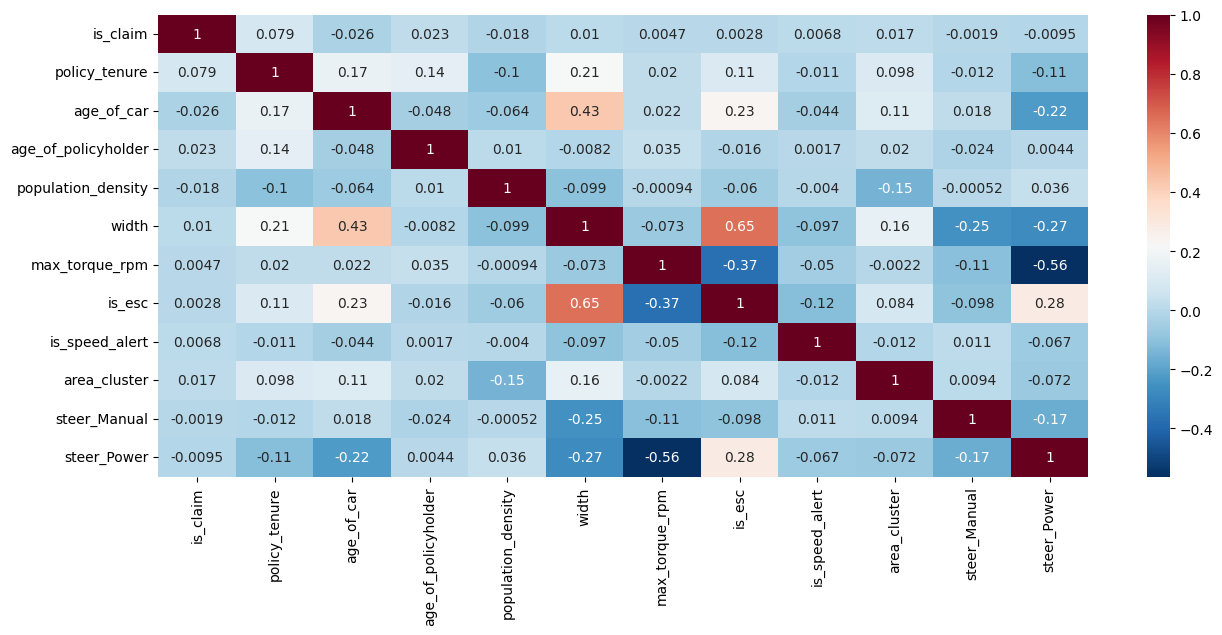

In [69]:
## Correlation matrix among the selected variables
plt.figure(figsize=(15,6))
corr=car_train[variables].corr()
sns.heatmap(corr, annot=True, cmap="RdBu_r")

In [70]:
# Preparing the dataset for hipotesis 
car_hipot = car_train[variables]

In [71]:
# Split dependent and independents variables
X_hipot = car_hipot.drop('is_claim', axis=1)  # independent variable
y_hipot = car_hipot['is_claim'] # dependent variable

In [86]:
# split train and test
X_hipot_before, X_hipot_test, y_hipot_before, y_hipot_test = train_test_split(X_hipot, y_hipot, test_size=0.2, random_state=42)

In [87]:
# Instantiate SMOTE
sm = SMOTE(random_state=42, sampling_strategy=1)
# Fittign SMOTE to the train set
X_hipot_train, y_hipot_train = sm.fit_resample(X_hipot_before, y_hipot_before)

In [88]:
y_hipot_train.value_counts()

0    43414
1    43414
Name: is_claim, dtype: int64

>### 3.1 Hipotesis 1 (Base). Logistic model - using all the dataset (no resampling)

In [89]:
X_hipot1 = car_hipot.drop('is_claim', axis=1)  # independent variable
y_hipot1 = car_hipot['is_claim'] # dependent variable

In [90]:
# split train and test
X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.2, random_state=43)

In [91]:
# Logistic Regression
LogReg = LogisticRegression(max_iter = 10000)
LogReg.fit(X_hipot1_train, y_hipot1_train)

LogisticRegression(max_iter=10000)

In [92]:
# forecasting with the train
y_train_pred = LogReg.predict(X_hipot1_train)
rmse_hipot1_train = np.sqrt(mean_squared_error(y_true = y_hipot1_train, y_pred = y_train_pred))
r2_hipot1_train = LogReg.score(X_hipot1_train, y_hipot1_train)
# forecasting with the test
y_test_pred = LogReg.predict(X_hipot1_test)
rmse_hipot1_test = np.sqrt(mean_squared_error(y_true = y_hipot1_test, y_pred = y_test_pred))
r2_hipot1_test = LogReg.score(X_hipot1_test, y_hipot1_test)

print('RMSE train = '+ str(rmse_hipot1_train))
print('RMSE test = '+ str(rmse_hipot1_test))
print('Accuracy train: {:.2f}'.format(accuracy_score(y_hipot1_train, y_train_pred)))
print('Accuracy test: {:.2f}'.format(accuracy_score(y_hipot1_test, y_test_pred)))
print('F1 score train = '+ str(f1_score(y_hipot1_train, y_train_pred)))
print('F1 score test = '+ str(f1_score(y_hipot1_test, y_test_pred)))
print("R^2 train: ", str(r2_hipot1_train))
print("R^2 test: ", str(r2_hipot1_test))
print('Gini normalized train: {:.2f}'.format(Gini_normalized(y_hipot1_train, y_train_pred)))
print('Gini Normalized test: {:.2f}'.format(Gini_normalized(y_hipot1_test, y_test_pred)))


RMSE train = 0.2523587451008714
RMSE test = 0.2575974161703667
Accuracy train: 0.94
Accuracy test: 0.93
F1 score train = 0.0
F1 score test = 0.0
R^2 train:  0.9363150637711134
R^2 test:  0.9336435711823509
Gini normalized train: 0.00
Gini Normalized test: 0.00


In [93]:
confusion = confusion_matrix(y_hipot1_test, y_test_pred)
print(confusion)

[[10834     0]
 [  770     0]]


In [94]:
y_test_pred.sum()

0

#### Note that the accuracy paradox. The accuracy on the test dataset is 93%. However, the model does not predict any Claim. 

In [95]:
# Confusion Matrix - Calculating all parameters.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_hipot1_train, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# Precision
print("Precision:-", TP / float(TP + FP))
# F1-Score
Sensitivity = TP / float(TP+FN)
Precision = TP / float(TP + FP)
F1_Score= 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
print("F1_Score:-",F1_Score)

Accuracy:- 0.9363150637711134
Sensitivity:- 0.0
Specificity:- 1.0
Precision:- nan
F1_Score:- nan


C:\Users\wadri\AppData\Local\Temp\ipykernel_11028\1595540925.py:13: RuntimeWarning: invalid value encountered in divide
  print("Precision:-", TP / float(TP + FP))
C:\Users\wadri\AppData\Local\Temp\ipykernel_11028\1595540925.py:16: RuntimeWarning: invalid value encountered in divide
  Precision = TP / float(TP + FP)


>### 3.2 Hipotesis 2. Logistic model with balanced data by SMOTE
We will create synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [96]:
# Logistic Regression
LogReg = LogisticRegression(max_iter=10000)
LogReg.fit(X_hipot_train, y_hipot_train)

LogisticRegression(max_iter=10000)

In [97]:
# forecasting with the train
y_train_pred = LogReg.predict(X_hipot_train)
rmse_hipot2_train = np.sqrt(mean_squared_error(y_true = y_hipot_train, y_pred = y_train_pred))
r2_hipot2_train = LogReg.score(X_hipot_train, y_hipot_train)
# forecasting with the test
y_test_pred = LogReg.predict(X_hipot_test)
rmse_hipot2_test = np.sqrt(mean_squared_error(y_true = y_hipot_test, y_pred = y_test_pred))
r2_hipot2_test = LogReg.score(X_hipot_test, y_hipot_test)

print('RMSE train = '+ str(rmse_hipot2_train))
print('RMSE test = '+ str(rmse_hipot2_test))
print('Accuracy train: {:.2f}'.format(accuracy_score(y_hipot_train, y_train_pred)))
print('Accuracy test: {:.2f}'.format(accuracy_score(y_hipot_test, y_test_pred)))
print('F1 score train = '+ str(f1_score(y_hipot_train, y_train_pred)))
print('F1 score test = '+ str(f1_score(y_hipot_test, y_test_pred)))
print("R^2 train: ", str(r2_hipot2_train))
print("R^2 test: ", str(r2_hipot2_test))
print('Gini normalized train: {:.2f}'.format(Gini_normalized(y_hipot_train, y_train_pred)))
print('Gini Normalized test: {:.2f}'.format(Gini_normalized(y_hipot_test, y_test_pred)))

RMSE train = 0.7017195183243682
RMSE test = 0.7701672103417262
Accuracy train: 0.51
Accuracy test: 0.41
F1 score train = 0.5605722684152646
F1 score test = 0.11993351233857562
R^2 train:  0.5075897176026166
R^2 test:  0.4068424681144433
Gini normalized train: 0.02
Gini Normalized test: 0.04


In [98]:
confusion = confusion_matrix(y_hipot_test, y_test_pred)
print(confusion)

[[4252 6628]
 [ 255  469]]


### Note that by applying resampling in the train dataset, the prediction of Claims improves in the test dataset (469 True Positives). The cost is the reduced Accuracy by the high False Positives (6628 in this case)

In [99]:
# Confusion Matrix - Calculating all parameters.
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives
FP = confusion[0,1] # false positives
TP = confusion[1,1] # true positive 
# Accuracy
print("Accuracy: ",accuracy_score(y_hipot_test, y_test_pred))
# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))
# Specificity
print("Specificity: ", TN / float(TN+FP))
# Precision
print("Precision: ", TP / float(TP + FP))
# F1-Score
Sensitivity = TP / float(TP+FN)
Precision = TP / float(TP + FP)
F1_Score= 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
print("F1_Score: ",F1_Score)

Accuracy:  0.4068424681144433
Sensitivity:  0.6477900552486188
Specificity:  0.39080882352941176
Precision:  0.06608426095533323
F1_Score:  0.11993351233857562


>### 3.3 Hipotesis 3. Neural Network with balanced data

In [100]:
X_hipot_train.shape[1]

11

In [101]:
## define Neural Networks for Classification using TensorFlow model
model = Sequential()
model.add(Dense(64, activation = "tanh", input_shape = [X_hipot_train.shape[1]]))
model.add(Dense(16, activation = "sigmoid"))
model.add(Dense(units = 1, activation = "sigmoid"))

In [102]:
# compile the Neural Networks for Classification using TensorFlow model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [103]:
# fit Neural Networks for Classification using TensorFlow model
model.fit(  x = np.asarray(X_hipot_train).astype(np.float64),
            y = np.asarray(y_hipot_train).astype(np.float64),
            epochs = 10, 
            batch_size = 32,
        )

Epoch 1/10
2714/2714 [==============================] - 8s 3ms/step - loss: 0.6934 - accuracy: 0.5117
Epoch 2/10
2714/2714 [==============================] - 9s 3ms/step - loss: 0.6928 - accuracy: 0.5110
Epoch 3/10
2714/2714 [==============================] - 9s 3ms/step - loss: 0.6924 - accuracy: 0.5147
Epoch 4/10
2714/2714 [==============================] - 9s 3ms/step - loss: 0.6924 - accuracy: 0.5145
Epoch 5/10
2714/2714 [==============================] - 9s 3ms/step - loss: 0.6923 - accuracy: 0.5174
Epoch 6/10
2714/2714 [==============================] - 9s 3ms/step - loss: 0.6922 - accuracy: 0.5159
Epoch 7/10
2714/2714 [==============================] - 9s 3ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 8/10
2714/2714 [==============================] - 9s 3ms/step - loss: 0.6920 - accuracy: 0.5167
Epoch 9/10
2714/2714 [==============================] - 9s 3ms/step - loss: 0.6921 - accuracy: 0.5160
Epoch 10/10
2714/2714 [==============================] - 9s 3ms/step - loss: 0.692

In [104]:
# forecasting with the train
pred = model.predict(np.asarray(X_hipot_train).astype(np.float64))
# pasar a valores 1 y 0
y_train_pred = [1 if pred[i]>0.5 else 0 for i in range(len(pred))] # NN produces a number between 0 and 1
rmse_hipot3_train = np.sqrt(mean_squared_error(y_true = y_hipot_train, y_pred = y_train_pred))

# forecasting with the test
pred = model.predict(np.asarray(X_hipot_test).astype(np.float64))
# pasar a valores 1 y 0
y_test_pred = [1 if pred[i]>0.5 else 0 for i in range(len(pred))] # NN produces a number between 0 and 1
rmse_hipot3_test = np.sqrt(mean_squared_error(y_true = y_hipot_test, y_pred = y_test_pred))

print('RMSE train = '+ str(rmse_hipot3_train))
print('RMSE test = '+ str(rmse_hipot3_test))
print('Accuracy train: {:.2f}'.format(accuracy_score(y_hipot_train, y_train_pred)))
print('Accuracy test: {:.2f}'.format(accuracy_score(y_hipot_test, y_test_pred)))
print('F1 score train = '+ str(f1_score(y_hipot_train, y_train_pred)))
print('F1 score test = '+ str(f1_score(y_hipot_test, y_test_pred)))
print('Gini normalized train: {:.2f}'.format(Gini_normalized(y_hipot_train, y_train_pred)))
print('Gini Normalized test: {:.2f}'.format(Gini_normalized(y_hipot_test, y_test_pred)))

363/363 [==============================] - 1s 2ms/step
RMSE train = 0.6935477131821719
RMSE test = 0.6404039357820847
Accuracy train: 0.52
Accuracy test: 0.59
F1 score train = 0.4756368567088099
F1 score test = 0.11657694449600892
Gini normalized train: 0.04
Gini Normalized test: 0.03


In [105]:
confusion = confusion_matrix(y_hipot_test, y_test_pred)
print(confusion)

[[6531 4349]
 [ 410  314]]


In [106]:
# Confusion Matrix - Calculating all parameters.
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives
FP = confusion[0,1] # false positives
TP = confusion[1,1] # true positive 
# Accuracy
print("Accuracy: ",accuracy_score(y_hipot_test, y_test_pred))
# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))
# Specificity
print("Specificity: ", TN / float(TN+FP))
# Precision
print("Precision: ", TP / float(TP + FP))
# F1-Score
Sensitivity = TP / float(TP+FN)
Precision = TP / float(TP + FP)
F1_Score= 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
print("F1_Score: ",F1_Score)

Accuracy:  0.5898827990348156
Sensitivity:  0.43370165745856354
Specificity:  0.6002757352941176
Precision:  0.06733862320394596
F1_Score:  0.11657694449600892


>### 3.4 Hipothesis 4 - Random Forest Classifier

In [107]:
model_random = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=5,
    min_weight_fraction_leaf=0.0,
    max_features=0.50,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample'
)
model_random.fit(X_hipot_train,y_hipot_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=0.5, min_samples_leaf=5, n_estimators=500,
                       n_jobs=-1, random_state=0)

In [108]:
# forecasting with the train
y_train_pred = model_random.predict(X_hipot_train)
rmse_hipot4_train = np.sqrt(mean_squared_error(y_true = y_hipot_train, y_pred = y_train_pred))
r2_hipot4_train = model_random.score(X_hipot_train, y_hipot_train)
# forecasting with the test
y_test_pred = model_random.predict(X_hipot_test)
rmse_hipot4_test = np.sqrt(mean_squared_error(y_true = y_hipot_test, y_pred = y_test_pred))
r2_hipot4_test = model_random.score(X_hipot_test, y_hipot_test)

print('RMSE train = '+ str(rmse_hipot4_train))
print('RMSE test = '+ str(rmse_hipot4_test))
print('Accuracy train: {:.2f}'.format(accuracy_score(y_hipot_train, y_train_pred)))
print('Accuracy test: {:.2f}'.format(accuracy_score(y_hipot_test, y_test_pred)))
print('F1 score train = '+ str(f1_score(y_hipot_train, y_train_pred)))
print('F1 score test = '+ str(f1_score(y_hipot_test, y_test_pred)))
print("R^2 train: ", str(r2_hipot4_train))
print("R^2 test: ", str(r2_hipot4_test))
print('Gini normalized train: {:.2f}'.format(Gini_normalized(y_hipot_train, y_train_pred)))
print('Gini Normalized test: {:.2f}'.format(Gini_normalized(y_hipot_test, y_test_pred)))

RMSE train = 0.4711954511414501
RMSE test = 0.5736065501013742
Accuracy train: 0.78
Accuracy test: 0.67
F1 score train = 0.7978143222720979
F1 score test = 0.15680212014134276
R^2 train:  0.7779748468236053
R^2 test:  0.6709755256807998
Gini normalized train: 0.56
Gini Normalized test: 0.17


In [109]:
confusion = confusion_matrix(y_hipot_test, y_test_pred)
print(confusion)

[[7431 3449]
 [ 369  355]]


In [110]:
# Confusion Matrix - Calculating all parameters.
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives
FP = confusion[0,1] # false positives
TP = confusion[1,1] # true positive 
# Accuracy
print("Accuracy: ",accuracy_score(y_hipot_test, y_test_pred))
# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))
# Specificity
print("Specificity: ", TN / float(TN+FP))
# Precision
print("Precision: ", TP / float(TP + FP))
# F1-Score
Sensitivity = TP / float(TP+FN)
Precision = TP / float(TP + FP)
F1_Score= 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
print("F1_Score: ",F1_Score)

Accuracy:  0.6709755256807998
Sensitivity:  0.4903314917127072
Specificity:  0.6829963235294118
Precision:  0.09332281808622503
F1_Score:  0.15680212014134276


>### 3.5 Hipothesis 5: CatBoostClassifier model

In [111]:
categorical_features_indices = np.where((X_hipot_train.dtypes == object).values.astype(int) == 1)[0]

In [112]:
catboost_base = CatBoostClassifier(verbose=False,random_state=0, scale_pos_weight=10)
catboost_base.fit(X_hipot_train, y_hipot_train,cat_features=categorical_features_indices)

In [113]:
# forecasting with the train
y_train_pred = catboost_base.predict(X_hipot_train)
rmse_hipot5_train = np.sqrt(mean_squared_error(y_true = y_hipot_train, y_pred = y_train_pred))
r2_hipot5_train = catboost_base.score(X_hipot_train, y_hipot_train)
# forecasting with the test
y_test_pred = catboost_base.predict(X_hipot_test)
rmse_hipot5_test = np.sqrt(mean_squared_error(y_true = y_hipot_test, y_pred = y_test_pred))
r2_hipot5_test = catboost_base.score(X_hipot_test, y_hipot_test)

print('RMSE train = '+ str(rmse_hipot5_train))
print('RMSE test = '+ str(rmse_hipot5_test))
print('Accuracy train: {:.2f}'.format(accuracy_score(y_hipot_train, y_train_pred)))
print('Accuracy test: {:.2f}'.format(accuracy_score(y_hipot_test, y_test_pred)))
print('F1 score train = '+ str(f1_score(y_hipot_train, y_train_pred)))
print('F1 score test = '+ str(f1_score(y_hipot_test, y_test_pred)))
print("R^2 train: ", str(r2_hipot5_train))
print("R^2 test: ", str(r2_hipot5_test))
print('Gini normalized train: {:.2f}'.format(Gini_normalized(y_hipot_train, y_train_pred)))
print('Gini Normalized test: {:.2f}'.format(Gini_normalized(y_hipot_test, y_test_pred)))

RMSE train = 0.4179044436414796
RMSE test = 0.5947025709378104
Accuracy train: 0.83
Accuracy test: 0.65
F1 score train = 0.8499980216040833
F1 score test = 0.16142214957090315
R^2 train:  0.8253558759847054
R^2 test:  0.6463288521199586
Gini normalized train: 0.65
Gini Normalized test: 0.20


In [114]:
confusion = confusion_matrix(y_hipot_test, y_test_pred)
print(confusion)

[[7105 3775]
 [ 329  395]]


In [115]:
# Confusion Matrix - Calculating all parameters.
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives
FP = confusion[0,1] # false positives
TP = confusion[1,1] # true positive 
# Accuracy
print("Accuracy: ",accuracy_score(y_hipot_test, y_test_pred))
# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))
# Specificity
print("Specificity: ", TN / float(TN+FP))
# Precision
print("Precision: ", TP / float(TP + FP))
# F1-Score
Sensitivity = TP / float(TP+FN)
Precision = TP / float(TP + FP)
F1_Score= 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
print("F1_Score: ",F1_Score)

Accuracy:  0.6463288521199586
Sensitivity:  0.5455801104972375
Specificity:  0.6530330882352942
Precision:  0.09472422062350119
F1_Score:  0.16142214957090315


>### 3.6 Hipothesis 6: Gradient Boosting Classifier model

In [116]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=250, learning_rate=0.1)

# fitting the model
gbrt.fit(X_hipot_train,y_hipot_train)

GradientBoostingClassifier(max_depth=2, n_estimators=250)

In [117]:
# predict and evaluting the model
y_pred_gbrt = gbrt.predict(X_hipot_test)

# evalution
print(classification_report(y_hipot_test,y_pred_gbrt))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10880
           1       0.10      0.09      0.09       724

    accuracy                           0.90     11604
   macro avg       0.52      0.52      0.52     11604
weighted avg       0.89      0.90      0.89     11604



In [118]:
# forecasting with the train
y_train_pred = gbrt.predict(X_hipot_train)
rmse_hipot6_train = np.sqrt(mean_squared_error(y_true = y_hipot_train, y_pred = y_train_pred))
r2_hipot6_train = gbrt.score(X_hipot_train, y_hipot_train)
# forecasting with the test
y_test_pred = gbrt.predict(X_hipot_test)
rmse_hipot6_test = np.sqrt(mean_squared_error(y_true = y_hipot_test, y_pred = y_test_pred))
r2_hipot6_test = gbrt.score(X_hipot_test, y_hipot_test)

print('RMSE train = '+ str(rmse_hipot6_train))
print('RMSE test = '+ str(rmse_hipot6_test))
print('Accuracy train: {:.2f}'.format(accuracy_score(y_hipot_train, y_train_pred)))
print('Accuracy test: {:.2f}'.format(accuracy_score(y_hipot_test, y_test_pred)))
print('F1 score train = '+ str(f1_score(y_hipot_train, y_train_pred)))
print('F1 score test = '+ str(f1_score(y_hipot_test, y_test_pred)))
print("R^2 train: ", str(r2_hipot6_train))
print("R^2 test: ", str(r2_hipot6_test))
print('Gini normalized train: {:.2f}'.format(Gini_normalized(y_hipot_train, y_train_pred)))
print('Gini Normalized test: {:.2f}'.format(Gini_normalized(y_hipot_test, y_test_pred)))

RMSE train = 0.3037290692238604
RMSE test = 0.3231822125405192
Accuracy train: 0.91
Accuracy test: 0.90
F1 score train = 0.9035961871750433
F1 score test = 0.09417040358744393
R^2 train:  0.9077486525084074
R^2 test:  0.8955532574974147
Gini normalized train: 0.82
Gini Normalized test: 0.04


In [119]:
confusion = confusion_matrix(y_hipot_test, y_test_pred)
print(confusion)

[[10329   551]
 [  661    63]]


In [120]:
# Confusion Matrix - Calculating all parameters.
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives
FP = confusion[0,1] # false positives
TP = confusion[1,1] # true positive 
# Accuracy
print("Accuracy: ",accuracy_score(y_hipot_test, y_test_pred))
# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))
# Specificity
print("Specificity: ", TN / float(TN+FP))
# Precision
print("Precision: ", TP / float(TP + FP))
# F1-Score
Sensitivity = TP / float(TP+FN)
Precision = TP / float(TP + FP)
F1_Score= 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
print("F1_Score: ",F1_Score)

Accuracy:  0.8955532574974147
Sensitivity:  0.08701657458563536
Specificity:  0.9493566176470588
Precision:  0.10260586319218241
F1_Score:  0.09417040358744393


>### 3.7 Hipothesis 7: Extreme Gradient Boosting (XGBoost) Classifer model

In [121]:
xgb = XGBClassifier(n_estimators = 500)
# fit the model
xgb.fit(X_hipot_train,y_hipot_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [122]:
# predict and evaluting the model
y_pred_xgb = xgb.predict(X_hipot_test)

# evalution
print(classification_report(y_hipot_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10880
           1       0.09      0.01      0.02       724

    accuracy                           0.93     11604
   macro avg       0.51      0.50      0.49     11604
weighted avg       0.89      0.93      0.91     11604



In [123]:
# forecasting with the train
y_train_pred = xgb.predict(X_hipot_train)
rmse_hipot7_train = np.sqrt(mean_squared_error(y_true = y_hipot_train, y_pred = y_train_pred))
r2_hipot7_train = xgb.score(X_hipot_train, y_hipot_train)
# forecasting with the test
y_test_pred = xgb.predict(X_hipot_test)
rmse_hipot7_test = np.sqrt(mean_squared_error(y_true = y_hipot_test, y_pred = y_test_pred))
r2_hipot7_test = xgb.score(X_hipot_test, y_hipot_test)

print('RMSE train = '+ str(rmse_hipot7_train))
print('RMSE test = '+ str(rmse_hipot7_test))
print('Accuracy train: {:.2f}'.format(accuracy_score(y_hipot_train, y_train_pred)))
print('Accuracy test: {:.2f}'.format(accuracy_score(y_hipot_test, y_test_pred)))
print('F1 score train = '+ str(f1_score(y_hipot_train, y_train_pred)))
print('F1 score test = '+ str(f1_score(y_hipot_test, y_test_pred)))
print("R^2 train: ", str(r2_hipot7_train))
print("R^2 test: ", str(r2_hipot7_test))
print('Gini normalized train: {:.2f}'.format(Gini_normalized(y_hipot_train, y_train_pred)))
print('Gini Normalized test: {:.2f}'.format(Gini_normalized(y_hipot_test, y_test_pred)))

RMSE train = 0.16201016480391808
RMSE test = 0.2602599925116645
Accuracy train: 0.97
Accuracy test: 0.93
F1 score train = 0.9730630577389044
F1 score test = 0.017499999999999998
R^2 train:  0.9737527065002073
R^2 test:  0.9322647362978284
Gini normalized train: 0.95
Gini Normalized test: 0.00


In [124]:
confusion = confusion_matrix(y_hipot_test, y_test_pred)
print(confusion)

[[10811    69]
 [  717     7]]


In [125]:
# Confusion Matrix - Calculating all parameters.
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives
FP = confusion[0,1] # false positives
TP = confusion[1,1] # true positive 
# Accuracy
print("Accuracy: ",accuracy_score(y_hipot_test, y_test_pred))
# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))
# Specificity
print("Specificity: ", TN / float(TN+FP))
# Precision
print("Precision: ", TP / float(TP + FP))
# F1-Score
Sensitivity = TP / float(TP+FN)
Precision = TP / float(TP + FP)
F1_Score= 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
print("F1_Score: ",F1_Score)

Accuracy:  0.9322647362978284
Sensitivity:  0.009668508287292817
Specificity:  0.9936580882352941
Precision:  0.09210526315789473
F1_Score:  0.017499999999999998


>### 3.8 Hipothesis 8: LightGBM model

In [126]:
lgb_params = {
        'objective': 'binary',
       'is_unbalance': True, # As we have a severe imbalanced class
        'metric': 'auc',
        'n_estimators': 500,
        'n_jobs': 1,
        'learning_rate': 0.01,
        'num_leaves': 30
    }
model = lgb.LGBMClassifier()
model.set_params(**lgb_params)

LGBMClassifier(is_unbalance=True, learning_rate=0.01, metric='auc',
               n_estimators=500, n_jobs=1, num_leaves=30, objective='binary')

In [127]:
# fit the model
model.fit(X_hipot_train,y_hipot_train)

LGBMClassifier(is_unbalance=True, learning_rate=0.01, metric='auc',
               n_estimators=500, n_jobs=1, num_leaves=30, objective='binary')

In [128]:
# forecasting with the train
y_train_pred = model.predict(X_hipot_train)
rmse_hipot7_train = np.sqrt(mean_squared_error(y_true = y_hipot_train, y_pred = y_train_pred))
r2_hipot7_train = model.score(X_hipot_train, y_hipot_train)
# forecasting with the test
y_test_pred = model.predict(X_hipot_test)
rmse_hipot7_test = np.sqrt(mean_squared_error(y_true = y_hipot_test, y_pred = y_test_pred))
r2_hipot7_test = model.score(X_hipot_test, y_hipot_test)

print('RMSE train = '+ str(rmse_hipot7_train))
print('RMSE test = '+ str(rmse_hipot7_test))
print('Accuracy train: {:.2f}'.format(accuracy_score(y_hipot_train, y_train_pred)))
print('Accuracy test: {:.2f}'.format(accuracy_score(y_hipot_test, y_test_pred)))
print('F1 score train = '+ str(f1_score(y_hipot_train, y_train_pred)))
print('F1 score test = '+ str(f1_score(y_hipot_test, y_test_pred)))
print("R^2 train: ", str(r2_hipot7_train))
print("R^2 test: ", str(r2_hipot7_test))
print('Gini normalized train: {:.2f}'.format(Gini_normalized(y_hipot_train, y_train_pred)))
print('Gini Normalized test: {:.2f}'.format(Gini_normalized(y_hipot_test, y_test_pred)))

RMSE train = 0.26942863742855033
RMSE test = 0.2671230152458665
Accuracy train: 0.93
Accuracy test: 0.93
F1 score train = 0.9225704212375465
F1 score test = 0.028169014084507043
R^2 train:  0.9274082093333947
R^2 test:  0.9286452947259566
Gini normalized train: 0.85
Gini Normalized test: 0.01


In [129]:
confusion = confusion_matrix(y_hipot_test, y_test_pred)
print(confusion)

[[10764   116]
 [  712    12]]


In [130]:
# Confusion Matrix - Calculating all parameters.
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives
FP = confusion[0,1] # false positives
TP = confusion[1,1] # true positive 
# Accuracy
print("Accuracy: ",accuracy_score(y_hipot_test, y_test_pred))
# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))
# Specificity
print("Specificity: ", TN / float(TN+FP))
# Precision
print("Precision: ", TP / float(TP + FP))
# F1-Score
Sensitivity = TP / float(TP+FN)
Precision = TP / float(TP + FP)
F1_Score= 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
print("F1_Score: ",F1_Score)

Accuracy:  0.9286452947259566
Sensitivity:  0.016574585635359115
Specificity:  0.9893382352941177
Precision:  0.09375
F1_Score:  0.028169014084507043


Logistic model without resampling does not predict any insurance claim. Logistic model with resampling (SMOTE) improves prediction but F1 in test data is still small (0.1199) and Gini (0.04). Neural Network model has a F1 (0.1165) and Gini (0.03). Random Forest has a F1 = 0.1568 and a Gini of 0.17. CatBoostClassifier presents a F1 of 0.1614 and a Gini of 0.20. Gradient Boosting Classifier (F1 = 0.0941 and Gini= 0.04). Extreme Gradient Boosting (XGBoost) with F1= 0.0174 and Gini = 0. Finally, LightGBM model presents a F1 = 0.0281 and Gini = 0.01.
Predicting extreme events such a insurance claims is very important problem but is very difficult due to the nature of the event. In the present case we do not have important variables such a the driver's skills, the technical condition of the car or the number of claims caused by the driver in previous years.
Note that no model is excelent predicting insurance claims but the best performance in this cases is shown by the CatBoosClassifier with predicted 395 claims over the 724 claims in the test dataset, but it also produce false alrma in 3775 cases over 10880 no claim cases. 